In [2]:
'''
Business problem :- To Rank order the transactions in their likelihood of being Fraud  (Anomaly Detection)

Possible ways :
1. Supervised :- Using Non_linear Algorithms like Bagging(Random Forest),Boosting(Ada,GBM,XGBoost etc.)
2. Supervised :- Using Deep Neural Networks or Convolutional Neural Networks
3. UnSupervised :- Using K-Means Clustering

4. Self-Supervised :- Auroencoders
'''

In [ ]:
######################################## Autoencoders for Anamoly Detection ##########################################

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import keras
from keras.layers import Input,Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
###### Data can be downloaded from:-  https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().values.any()

False

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
x= pd.DataFrame();
x['count'] = (data['Class'].value_counts()/len(data['Class']))*100
x['class'] = data['Class'].value_counts().index

In [7]:
x

,count,class
0,99.827251,0
1,0.172749,1


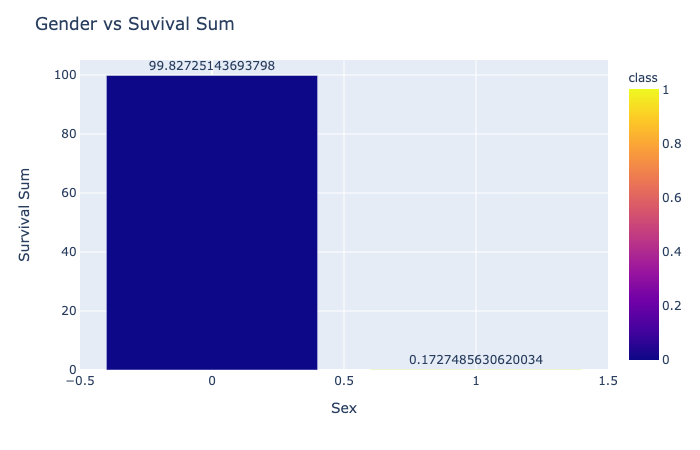

'\n\n 99.8% of the transactions are normal.    \n\n'

In [9]:
fig = px.bar(x, x='class', y='count',color='class', height = 500,text='count');
fig.update_layout(xaxis_title='Sex',yaxis_title='Survival Sum',title='Gender vs Suvival Sum');
fig.update_traces(textposition='outside').show("png")                    

'''

 99.8% of the transactions are normal.    

'''

In [10]:
data[data.Class == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
data[data.Class==0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
data.drop(['Time'],inplace=True,axis=1)

In [14]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
## purpose -1 is when you don't know the shape !

In [161]:
data['Amount'] 

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [15]:
x_train,x_test = train_test_split(data,test_size=.2)

In [16]:
x_train.index = range(len(x_train))
x_test.index=range(len(x_test))

In [17]:
x_train['Class'].value_counts()

0    227441
1       404
Name: Class, dtype: int64

In [18]:
x_test['Class'].value_counts()

0    56874
1       88
Name: Class, dtype: int64

In [19]:
x_train_encoder=x_train.drop(['Class'],axis=1)
x_test_encoder=x_test.drop(['Class'],axis=1)

In [20]:
x_train_encoder.shape[1]

29

In [ ]:
############################################## Autoencoder Architecture ##############################################

In [97]:
input_layer = Input(shape=(x_train_encoder.shape[1],),name="input")

x = Dense(16, activation="relu", activity_regularizer=regularizers.l1(10e-5),name='Hidden-1')(input_layer)
x = Dense(8, activation="relu",name="Hidden-2")(x)

encoder = Dense(6,activation='relu',name="Encoder")(x)

x = Dense(8,activation='tanh',name='Hidden-3')(encoder)
x = Dense(16, activation='relu',name='Hidden-4')(x)

decoder = Dense(x_train_encoder.shape[1],activation='relu',name='Decoder-Output')(x)

autoencoder = Model(inputs=input_layer, outputs=decoder, name = 'myauto')

In [98]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])
checkpointer = ModelCheckpoint(filepath="cred_card_anomaly_autoencoder.h5",
                               verbose=0,
                               save_best_only=True)
early_stop=EarlyStopping(monitor='val_loss',patience=4, restore_best_weights=True,mode='auto')

In [94]:
autoencoder.summary()

Model: "myauto"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 29)                0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 16)                480       
_________________________________________________________________
Hidden-2 (Dense)             (None, 8)                 136       
_________________________________________________________________
Encoder (Dense)              (None, 6)                 54        
_________________________________________________________________
Hidden-3 (Dense)             (None, 8)                 56        
_________________________________________________________________
Hidden-4 (Dense)             (None, 16)                144       
_________________________________________________________________
Decoder-Output (Dense)       (None, 29)                493  

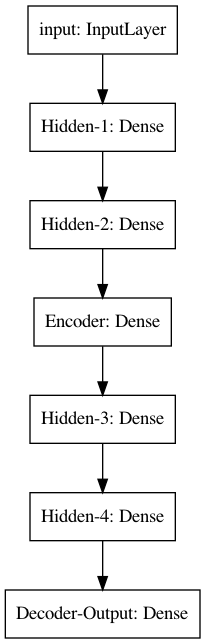

In [95]:
plot_model(autoencoder,dpi=96,show_layer_names=True)

In [99]:
model_history = autoencoder.fit(x_train_encoder,x_train_encoder,epochs=20,batch_size=32,
               validation_data=(x_test_encoder, x_test_encoder),verbose = 1,callbacks=[checkpointer,early_stop])


Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 19s 84us/step - loss: 0.8806 - accuracy: 0.5864 - val_loss: 0.7961 - val_accuracy: 0.6511
Epoch 2/20
227845/227845 [==============================] - 18s 81us/step - loss: 0.8182 - accuracy: 0.6634 - val_loss: 0.7810 - val_accuracy: 0.6740
Epoch 3/20
227845/227845 [==============================] - 19s 84us/step - loss: 0.8103 - accuracy: 0.6765 - val_loss: 0.7784 - val_accuracy: 0.6805
Epoch 4/20
227845/227845 [==============================] - 19s 83us/step - loss: 0.8047 - accuracy: 0.6857 - val_loss: 0.7718 - val_accuracy: 0.6922
Epoch 5/20
227845/227845 [==============================] - 19s 82us/step - loss: 0.8003 - accuracy: 0.6911 - val_loss: 0.7670 - val_accuracy: 0.6932
Epoch 6/20
227845/227845 [==============================] - 19s 84us/step - loss: 0.7975 - accuracy: 0.6938 - val_loss: 0.7643 - val_accuracy: 0.6993
Epoch 7/20
227845/227845 [=======================

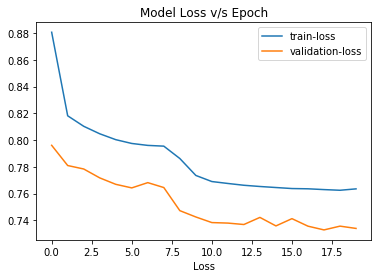

In [100]:
fig,ax = plt.subplots();
ax.plot(model_history.history['loss']);
ax.plot(model_history.history['val_loss']);
plt.xlabel('epoch');
plt.xlabel('Loss');
plt.title('Model Loss v/s Epoch');
plt.legend(['train-loss','validation-loss'],loc='upper right');
plt.show();

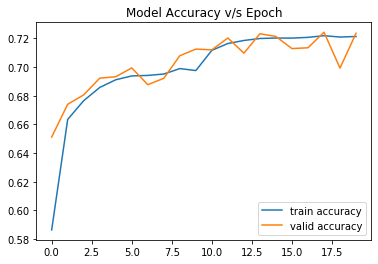

In [291]:
fig,ax=plt.subplots();
ax.plot(model_history.history['accuracy'],label='train accuracy');
ax.plot(model_history.history['val_accuracy'],label='valid accuracy');
plt.xlabel='epoch';
plt.ylabel='Accuracy';
plt.title('Model Accuracy v/s Epoch');
ax.legend(loc='lower right')
plt.show();

In [102]:
predictions = autoencoder.predict(x_test_encoder)

In [121]:
np.mean(np.power (predictions,2),axis=1)

array([0.20619921, 0.46987417, 0.12915953, ..., 2.6037033 , 0.06172569,
       0.10640381], dtype=float32)

In [137]:
mse = np.mean(np.power(x_test_encoder - predictions, 2), axis=1) ## Mean Square Error

In [138]:
mse

0         0.213322
1         0.735945
2         0.237250
3         1.148131
4         0.468055
           ...    
56957     1.499909
56958     0.194158
56959    26.485406
56960     0.871182
56961     0.198038
Length: 56962, dtype: float64

In [ ]:
### In Autoencoder Anomaly detection, the model doesn't predict the class rather we calculate the MSE and 
### fix a threshold, and if mse values which are more than this threshold value are considered as anomaly 

In [147]:
error_df = pd.DataFrame({'Mean_Square_Error': mse,
                        'Actual': x_test['Class']})

In [148]:
error_df.head()

,Mean_Square_Error,Actual
0,0.213322,0
1,0.735945,0
2,0.237250,0
3,1.148131,0
4,0.468055,0


In [233]:
error_df['Actual'][0:10]
error_df['Mean_Square_Error'][0]

0.21332178441129768

In [239]:
roc_auc_score(error_df['Actual'],error_df['Mean_Square_Error']) ## .96

0.9589055711668857

In [150]:
error_df[error_df.Actual==1]['Mean_Square_Error'].median()

9.522610085926495

In [151]:
error_df[error_df.Actual==0]['Mean_Square_Error'].median()

0.3826751708899561

In [195]:
LABELS = ["Normal", "Fraud"]

In [ ]:
## To Load the Model
#autoencoder = load_model('cred_card_anomaly_autoencoder.h5')

In [170]:
# let's leep threshold as median value of class = 1 which is 9.5
error_df['predicted_value']=[1 if e > 2 else 0 for e in list(error_df['Mean_Square_Error'])]

In [192]:
confusion_matrix(error_df['Actual'],error_df['predicted_value'])

array([[54852,  2022],
       [   13,    75]])

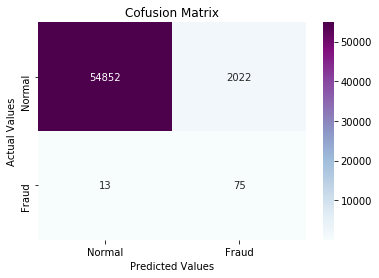

In [227]:
fig,ax_conf=plt.subplots()
sns.heatmap(confusion_matrix(error_df['Actual'],error_df['predicted_value']),
           xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt="d",
           cmap="BuPu");
ax_conf.set_xlabel('Predicted Values')
ax_conf.set_ylabel('Actual Values')
ax_conf.set_title('Cofusion Matrix')
plt.show();

In [242]:
error_df.sort_values(by='Mean_Square_Error',ascending=False,inplace=True)
error_df.index=range(len(error_df))
error_df['rank']=error_df.index+1
error_df['relative_prob']=1-error_df['rank']/len(error_df)

In [247]:
error_df

,Mean_Square_Error,Actual,predicted_value,rank,relative_prob
0,395.850699,0,1,1,0.999982
1,263.271553,1,1,2,0.999965
2,215.868020,0,1,3,0.999947
3,170.878728,0,1,4,0.999930
4,164.139431,0,1,5,0.999912
...,...,...,...,...,...
56957,0.037922,0,0,56958,0.000070
56958,0.037922,0,0,56959,0.000053
56959,0.037491,0,0,56960,0.000035
56960,0.036355,0,0,56961,0.000018


In [252]:
def lift_model(error_df):
    
    actual=sum(error_df['Actual'])
    count_total = len(error_df)
    percent = actual/count_total
    
    lift_err,percentile_array = [],[]
    
    [percentile_array.append(int(round(np.percentile(error_df.index.values,i)))) for i in range(2,101,2)]
    
    [lift_err.append(round(sum(error_df['Actual'][0:percentile_array[i]])/(percentile_array[i]*percent),2)) for i in range(0,50)]
    
    
    lift=pd.DataFrame({ 
             'Lift_Autoencoder': lift_err,
         'percentile value':percentile_array,
         'percentile' : np.arange(1,51,1)
            })    
    return lift

In [253]:
lift_autoencoder=lift_model(error_df)

In [292]:
lift_autoencoder.head()

,Lift_Autoencoder,percentile value,percentile
0,40.35,1139,1
1,21.31,2278,2
2,14.20,3418,3
3,11.08,4557,4
4,8.98,5696,5


In [ ]:
'''
Interpretation/Observation:

In top 2% of the transactions, rank order in their likelihood to be a fraud, 
our Autoencoder captured ~81% of the frauds. 

In top 2% of the transactions, rank order in their likelihood to be a fraud, 
our Autoencoder captured ~90% of the frauds. 

'''

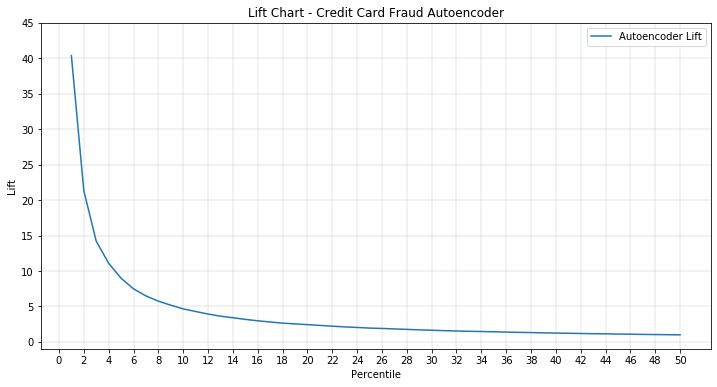

In [296]:
fig,ax_lift=plt.subplots(figsize=(12,6));
ax_lift.plot(lift_autoencoder['percentile'],lift_autoencoder['Lift_Autoencoder'],label='Autoencoder Lift');
ax_lift.set_xlabel('Percentile');
ax_lift.set_ylabel('Lift');
ax_lift.set_title('Lift Chart - Credit Card Fraud Autoencoder');
ax_lift.grid(color='grey',linestyle='-',linewidth=.4,alpha=.5)
plt.xticks(np.arange(0,52,2))
plt.yticks(np.arange(0,50,5))
ax_lift.legend();
plt.show();